# Subject Video Rating Correlations

In [2]:
## Data management and cleaning

In [3]:
import pandas as pd
import numpy as np
import os
import scipy
import scipy.io as sio
import itertools

from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline  

In [4]:
def half_integer_round(number): return round(number * 2) / 2
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [5]:
project_filepath = "/Users/mdclark/Desktop/EmpAcc/data/behavioraldata/scanfiles/"
derivative_filepath = "/Users/mdclark/Desktop/EmpAcc/data/behavioraldata/scanfiles_derivatives/"


project_file_contents = os.listdir(project_filepath)

project_file_contents_mat = [item for item in project_file_contents if ".mat" in item]


#Get unique subject IDs (first three numbers of filename)
unique_sub_ids = [item for item in project_file_contents if 'video' in item]
unique_sub_ids = set([str.split(file, "_")[0] for file in unique_sub_ids])

unique_sub_ids = ['229', '223', '146', '242', '179', '186', '138', '145', '157', '161', '191' ,'163', '214', '236', '245', '288',  '231', '196', '184', '220', '239', '195', '282', '177', '266', '160', '197', '208', '173', '216', '156', '200', '256', '167', '222', '279', '237', '263', '168', '280', '147', '165', '277', '278', '253', '188', '289', '162', '262', '276', '267', '139', '219', '260', '215', '257',  '154', '251', '274', '270']
unique_sub_ids.sort(key=float)

In [6]:
## Functions for Calcuating Correlations and Plotting

In [7]:
#Load and Concatenate all ref files from .mat files (no longer used)

# def create_ref_file(sub_id, project_file_contents):
#     ref_file_contents = [item for item in project_file_contents_mat if "intfMRI" + str(sub_id) in item]
#     ref_file_data = []
#     for file in ref_file_contents: 
#         mat_contents = sio.loadmat(project_filepath + file)
#         ref_file_data.append(pd.DataFrame(mat_contents['data']))
    
#     #Join all files and remove empty data and irrelevant columns
#     ref_file_data = pd.concat(ref_file_data)
#     ref_file_data = ref_file_data[ref_file_data[5] != 0]
#     ref_file_data = ref_file_data[ref_file_data[6] != 0]
#     ref_file_data = ref_file_data.loc[:,0:4]
    
#     ref_file_data.columns = ["sub_id", "trial", "video_number", "self_other", "neg_pos"]
    
#     #Remove duplicate trials
#     ref_file_data = ref_file_data.drop_duplicates("trial")
    
#     #Recode neg pos and self_other
#     ref_file_data['self_other'][ref_file_data['self_other'] == 1] = "self"
#     ref_file_data['self_other'][ref_file_data['self_other'] == 2] = "other"
#     ref_file_data['neg_pos'][ref_file_data['neg_pos'] == 1] = "neg"
#     ref_file_data['neg_pos'][ref_file_data['neg_pos'] == 2] = "pos"
    
#     return ref_file_data


In [8]:
# Create data frame that has all video data (per subject)

def get_video_data(sub_id, video):
    project_file_contents = os.listdir(project_filepath)
    sub_video_filenames = [item for item in project_file_contents if str(sub_id)  in item]
    sub_video_filenames = [item for item in sub_video_filenames if 'video' + str(video) + '.csv'  in item]    
    sub_video_data = []
    file = sub_video_filenames[0]


    csv_contents = pd.read_csv(project_filepath + file)
    video_data = pd.DataFrame(csv_contents)
    video_data.columns = ['second', 'rating']
    video_data['subject'] = str.split(file, "_")[0]
    video_data['video_number'] = int(float(str.split(file, "_")[2].replace('.csv', '').replace('video', '')))
    video_data['second'] = video_data['second'].apply(lambda x: half_integer_round(x))

    #ref_data = create_ref_file(sub_id, project_file_contents)
    #all_videos = pd.merge(sub_video_data, ref_data, on='video_number', how='left')
    #video_data = all_videos[all_videos['video_number'] == video]
    video_data = video_data[video_data['second'] != 0]
    

    return(video_data[['second','rating']])


In [9]:
#Plots correlations heatmap matrix

def plot_corrs(all_video_data, video):
    
    sns.set(style="white")

    # Compute the correlation matrix
    all_video_data = all_video_data.drop('second', 1) #Drop seconds for correlation
    corr = all_video_data.corr()

    # Genesampling_rate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Genesampling_rate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,  cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
    averge_z_correlation = calculate_aver_correlation(all_video_data)

    plt.title('Video: ' + str(video) + " , Correlation (z) " + str(averge_z_correlation))

    sub      corr         z
0   138  0.535730  0.598147
1   139  0.713079  0.893420
2   145  0.760927  0.998413
3   146  0.570994  0.648997
4   147  0.378258  0.398025
5   154  0.774704  1.031987
6   156  0.331240  0.344220
7   157  0.609771  0.708556
8   160  0.828408  1.183039
9   161  0.569938  0.647431
10  162  0.666339  0.804129
11  163  0.582517  0.666264
12  165  0.682852  0.834439
13  167  0.548496  0.616227
14  168  0.363120  0.380475
15  173  0.686687  0.841659
16  177  0.758812  0.993408
17  179  0.572082  0.650613
18  184  0.403720  0.428085
19  186  0.189547  0.191867
20  188  0.371589  0.390265
21  195  0.734556  0.938551
22  197  0.763917  1.005553
23  200  0.354343  0.370401
24  208  0.542218  0.607292
25  214  0.684682  0.837876
26  215  0.464389  0.502892
27  219  0.198728  0.201408
28  220  0.160722  0.162128
29  222  0.758086  0.991699
30  223  0.661790  0.795991
31  229  0.020336  0.020339
32  231  0.537197  0.600208
33  236 -0.035122 -0.035136
34  237  0.366001  0

0.6117103493561281

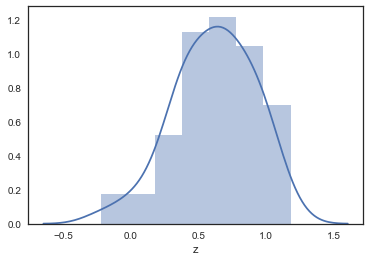

In [150]:
#Calculate average correlation (z)

def calculate_aver_correlation(all_video_data): 
#     unique_sub_ids = list(all_video_data)
#     combinations = pd.DataFrame(list(itertools.combinations(unique_sub_ids, 2)))
#     corr = all_video_data.corr()

#     corr_values = []
#     for index, row in combinations.iterrows():
#         corr_values.append([row[0], row[1], corr[row[0]][row[1]]])


#     corr_values = pd.DataFrame(corr_values)
#     corr_values.columns = ['sub1', 'sub2', 'corr']


    
#     corr_values['z'] = 0.5*np.log((1+corr_values['corr'])/(1-corr_values['corr']))
#     corr_values['z'] = pd.to_numeric(corr_values['z'], errors='coerce')

#     corr_values = corr_values.replace([np.inf, -np.inf], np.nan)
#     return(corr_values['z'].mean())

    unique_sub_ids = list(all_video_data)[1:] #Remove 'second' from column
    corr_values = []
    
    for subject in unique_sub_ids: 
        #Get everyone else's data
        subject_data = all_video_data[subject]
        mean_data = all_video_data.loc[:, all_video_data.columns != 'second']
        mean_data = mean_data.mean(axis=1)
        
        corr_values.append([subject,subject_data.corr(mean_data)])
        
    corr_values = pd.DataFrame(corr_values)
    corr_values.columns = ['sub', 'corr']
    
    corr_values['z'] = 0.5*np.log((1+corr_values['corr'])/(1-corr_values['corr']))
    corr_values['z'] = pd.to_numeric(corr_values['z'], errors='coerce')
    corr_values = corr_values.replace([np.inf, -np.inf], np.nan)
    
    sns.distplot(corr_values['z'].dropna())
    print(corr_values)
    return(corr_values['z'].mean())
    
        

all_video_data = pd.read_csv(derivative_filepath + 'correlationdata/' + 'video_all_' + str(3) + '.csv')

calculate_aver_correlation(all_video_data)

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [12]:
## Create and Save Correlations

In [13]:
# ##Calculate everything for all subject data

# z_correlations = []
# for video in range(1, 17): 
    
#     #Get video length and make array of each half second
#     video_length = get_video_data(unique_sub_ids[0], video)['second'].max()
#     all_video_data = pd.DataFrame({'second': list(frange(0, video_length, 0.5))})
    
#     #Compile all subjects video data
#     for sub_id in unique_sub_ids: 
        
#         try: 
#             #Get subject data and merge to column
#             subject_data = get_video_data(sub_id, video)
#             subject_data = subject_data.rename(columns ={'rating': sub_id})
#             all_video_data = pd.merge(all_video_data, subject_data , on='second', how='outer')
#             all_video_data = all_video_data[all_video_data['second'] != 0] #Remove data after scan is over
#             #all_video_data = all_video_data.fillna(method='pad', limit =1) #fill forward for any NAs, shouldn't be a problem for correlations

#         except Exception:
#             pass
#     #Add to z correlations list

#     all_video_data.to_csv(project_filepath + 'video_all_' + str(video) + '.csv', index=False)
#     z_correlations.append([video, calculate_aver_correlation(all_video_data)])


#Calculate subject video correlation (z). Did this here because I needed this data for fMRI analysis

# def calculate_subj_correlation(all_video_data, subj_id): 

#     unique_sub_ids = list(all_video_data)
#     combinations = pd.DataFrame(list(itertools.combinations(unique_sub_ids, 2)))
#     corr = all_video_data.corr()

#     corr_values = []
#     for index, row in combinations.iterrows():
#         corr_values.append([row[0], row[1], corr[row[0]][row[1]]])


#     corr_values = pd.DataFrame(corr_values)
#     corr_values.columns = ['sub1', 'sub2', 'corr']


#     corr_values = corr_values[(corr_values['sub1'] == subjid) | (corr_values['sub2'] == subjid)]

#     corr_values['z'] = 0.5*np.log((1+corr_values['corr'])/(1-corr_values['corr']))
#     corr_values['z'] = pd.to_numeric(corr_values['z'], errors='coerce')

#     corr_values = corr_values.replace([np.inf, -np.inf], np.nan)
#     return(corr_values['z'].mean())

# for subjid in unique_sub_ids:
#     z_correlations = []

#     for video in range(1, 17): 
#         all_video_data = pd.read_csv(derivative_filepath +'correlationdata/' + 'video_all_' + str(video) + '.csv')
#         all_video_data_dropped = all_video_data.drop(['second'], axis=1)
#         z_correlations.append([video, calculate_subj_correlation(all_video_data_dropped, subjid)])
        
#     all_correlations = pd.DataFrame(z_correlations)
#     all_correlations.columns = ['video', 'z_corr']
#     all_correlations.to_csv(derivative_filepath + 'correlationdata/' + subjid + '_z_correlations.csv', index=False)    

## Plots

###     Target  Rating and Average Participant Ratings

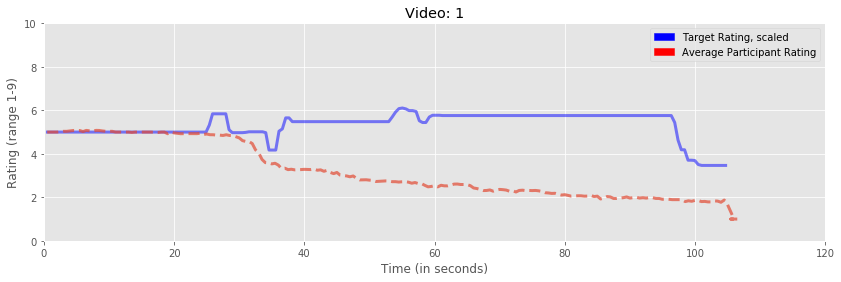

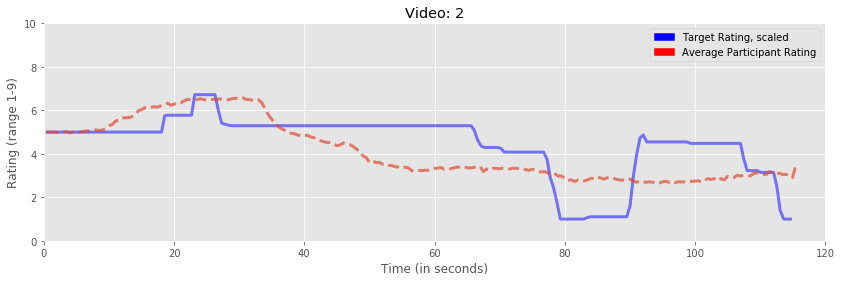

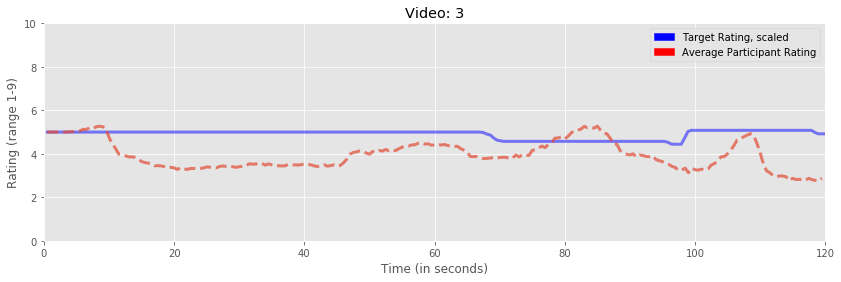

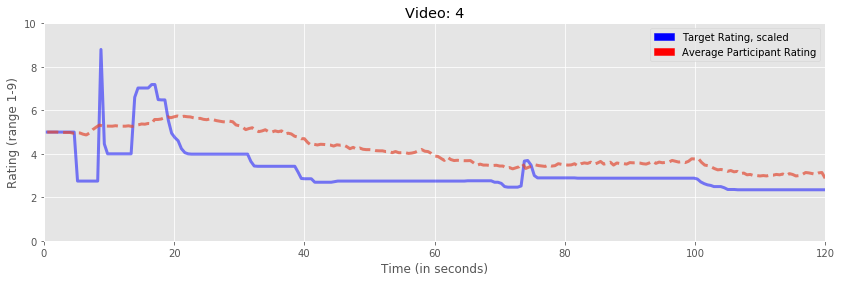

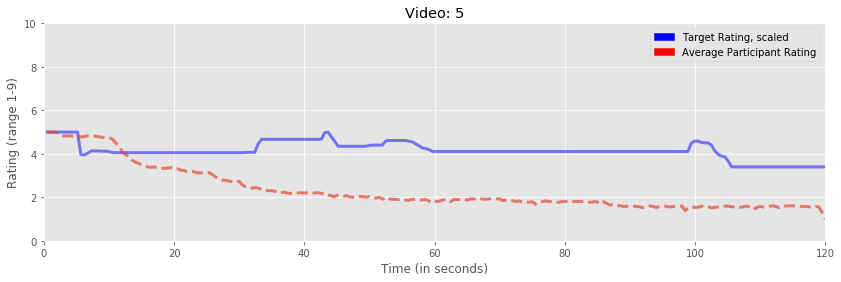

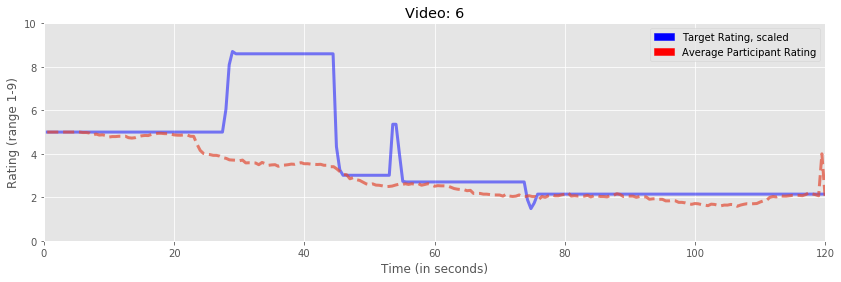

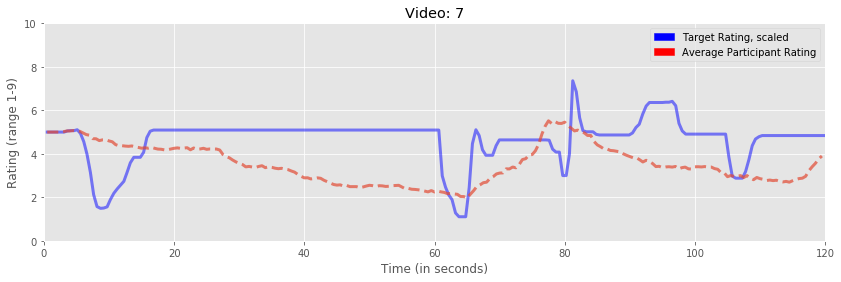

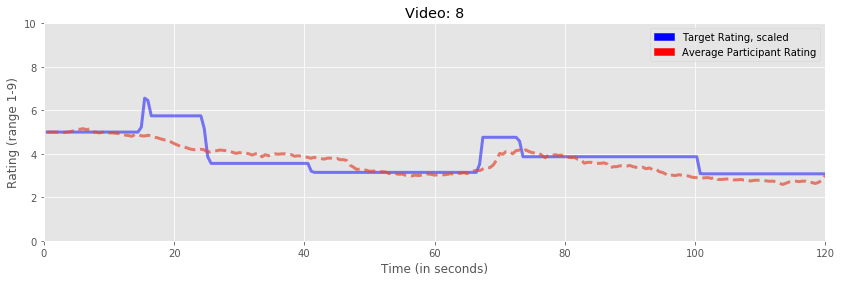

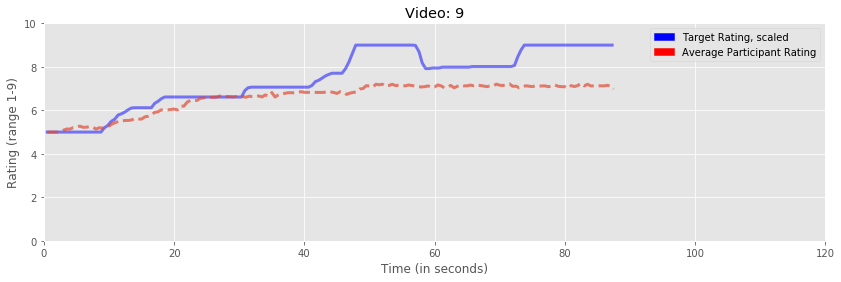

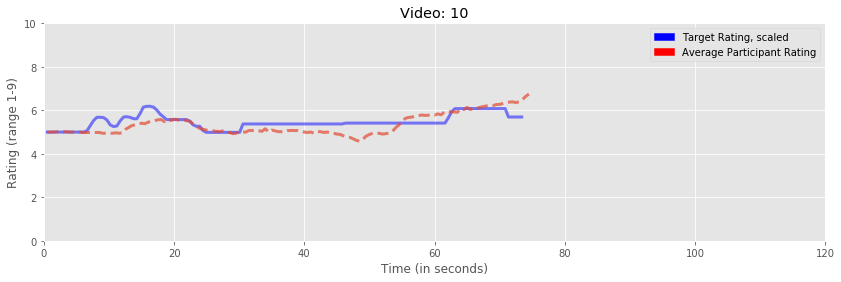

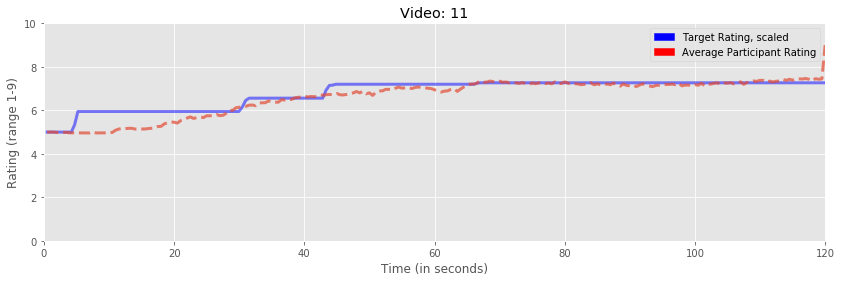

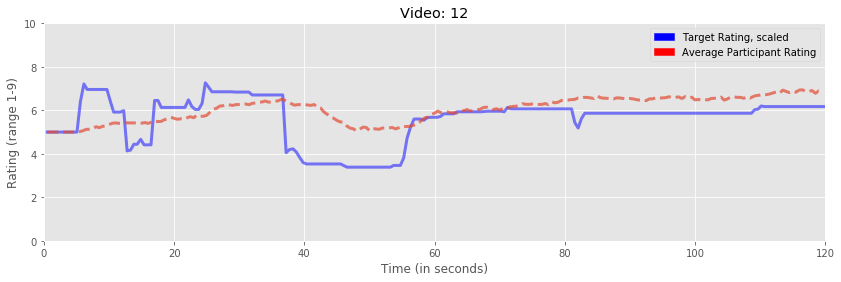

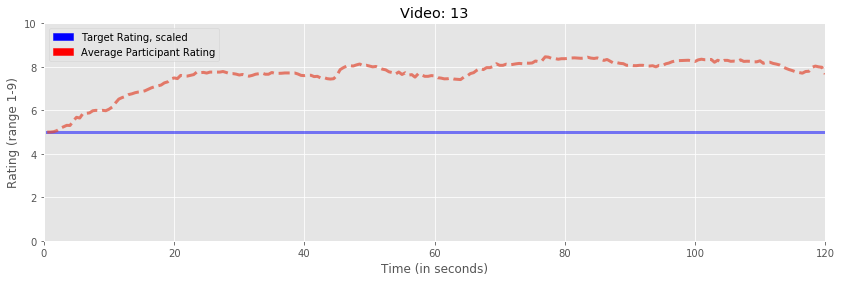

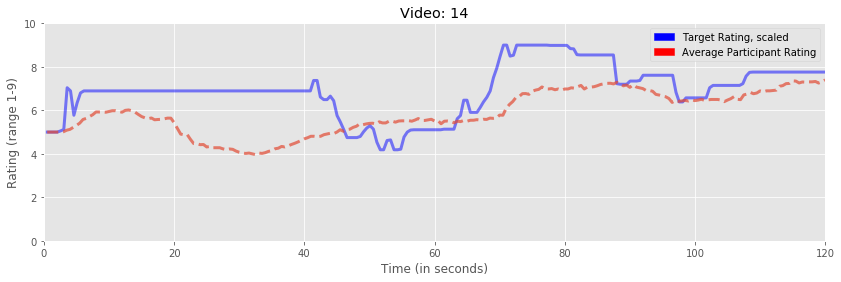

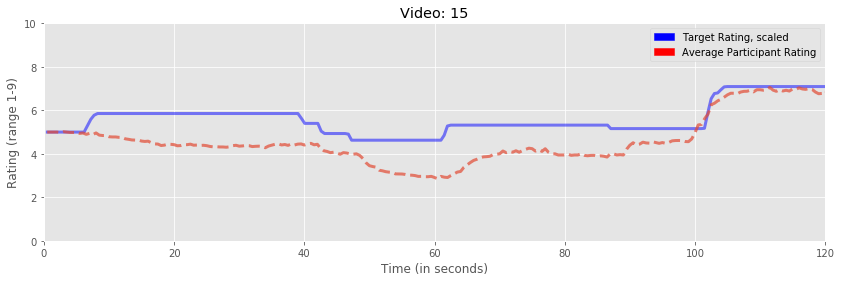

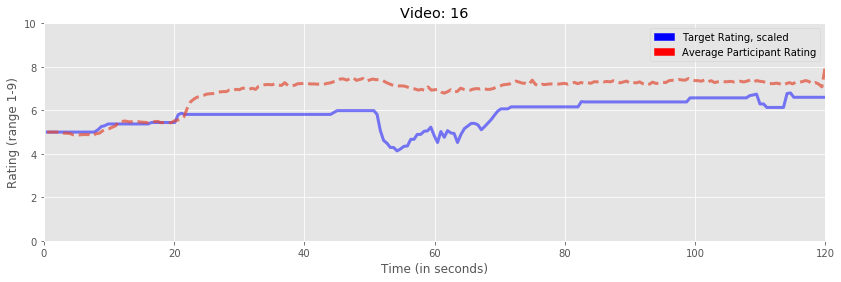

In [14]:
for video in range(1, 17): 
    all_video_data = pd.read_csv(derivative_filepath + 'correlationdata/' + 'video_all_' + str(video) + '.csv')
    target_data = pd.read_csv(project_filepath + '100_01_video' + str(video) + '.csv')

    target_data['rating_scaled'] = (((target_data[' rating'] - 0) * (9 - 1)) / (100 - 0)) + 1


    # Plot target
    
    x = target_data['time']
    y = target_data['rating_scaled']
    
    plt.figure(figsize=(14,4))
    plt.style.use('ggplot')

    plt.title("Video: " + str(video))
    plt.ylim(0,10)
    plt.ylabel('Rating (range 1-9)')
    plt.xlim(0,120)
    plt.xlabel('Time (in seconds)')

    plt.plot(x, y,'b', linewidth=3,  alpha=.5);



    
    # Plot data
    x = all_video_data['second']
    y = all_video_data.drop(['second'], axis=1).mean(axis=1)
    
    
    legend_blue = mpatches.Patch(color='blue', label='Target Rating, scaled')
    legend_red = mpatches.Patch(color='red', label='Average Participant Rating')
    plt.legend(handles=[legend_blue, legend_red])    
    
    plt.plot(x, y, '--', linewidth=3, alpha=.7);
    

### Matrix Plots of Participant Ratings and Time Course of Ratings

First plot is a matrix of correlations between participants. 
Second plot is each participant's ratings by time. 

/Users/mdclark/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


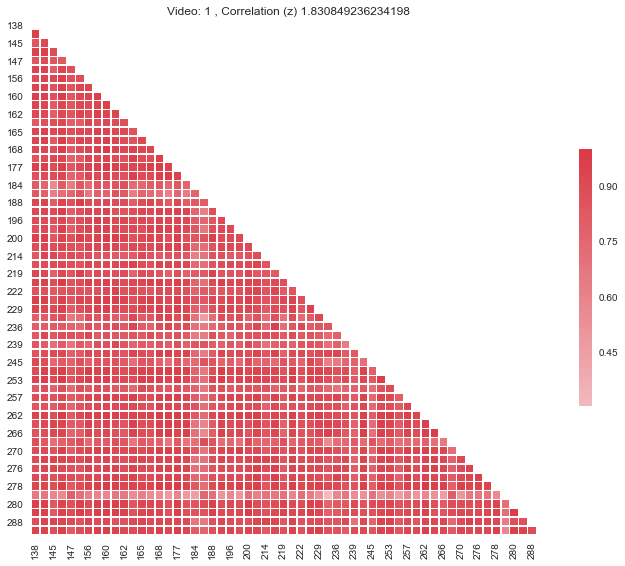

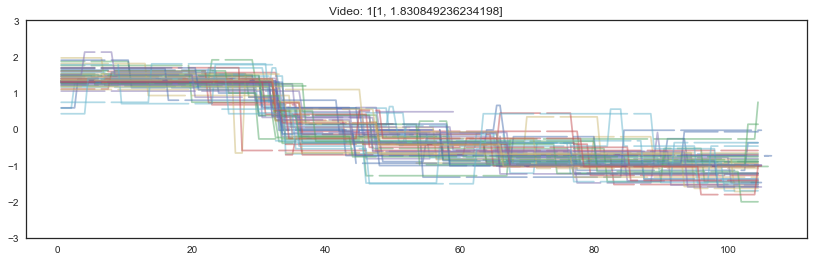

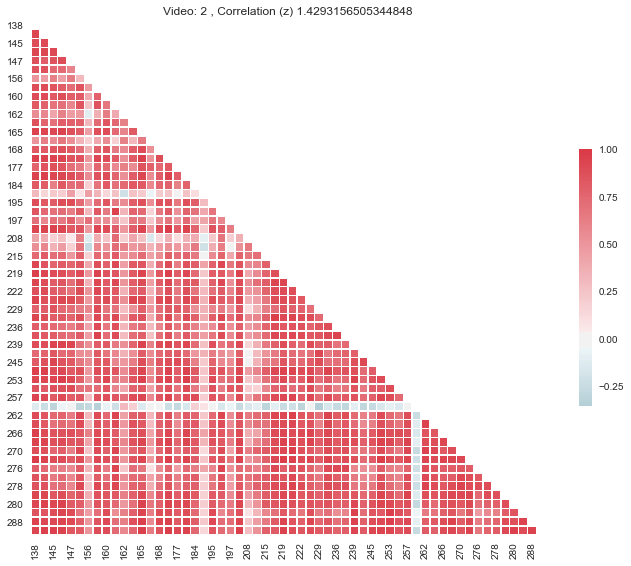

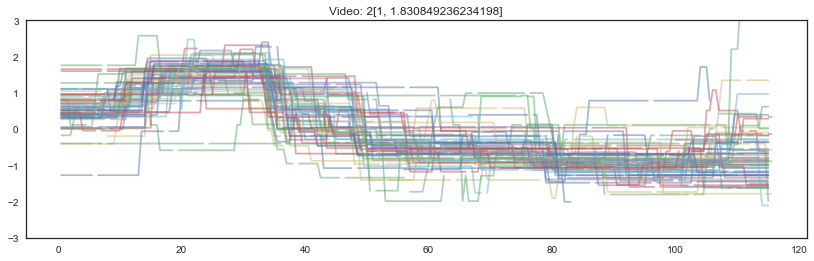

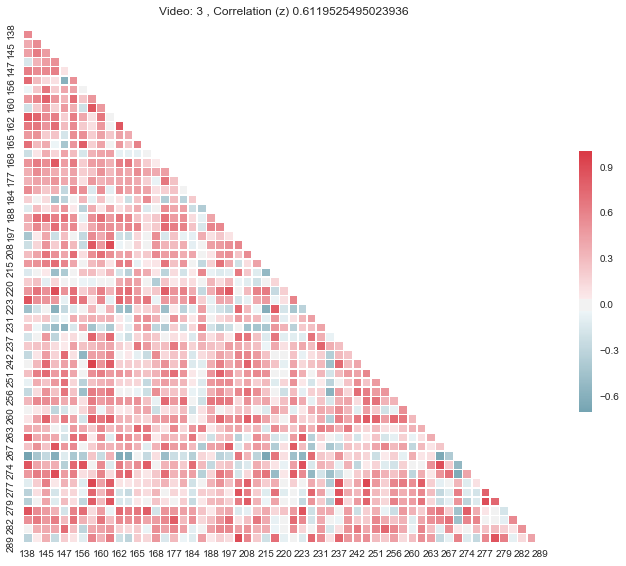

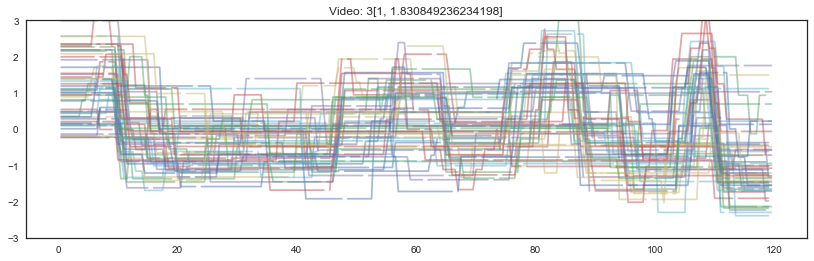

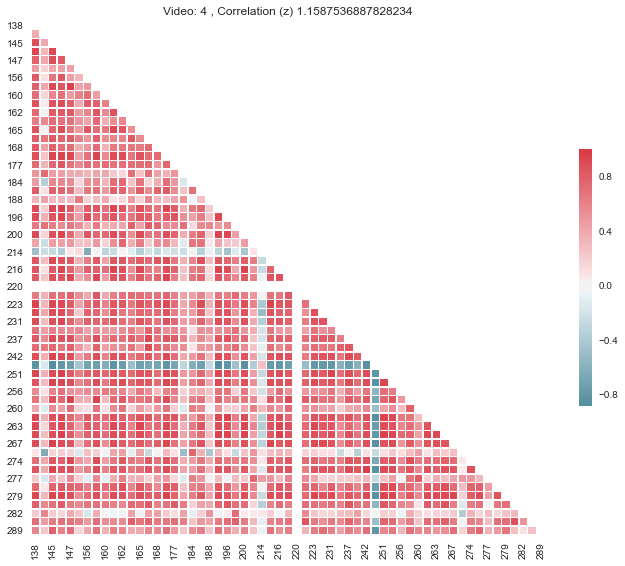

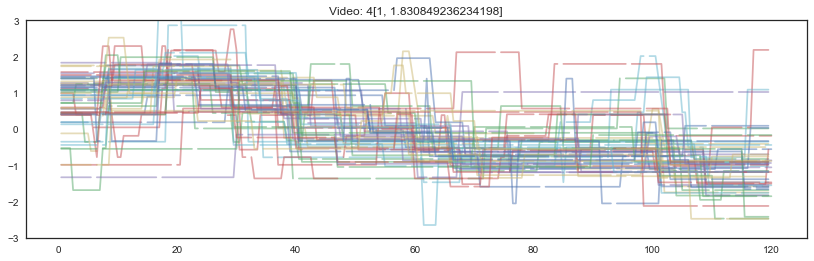

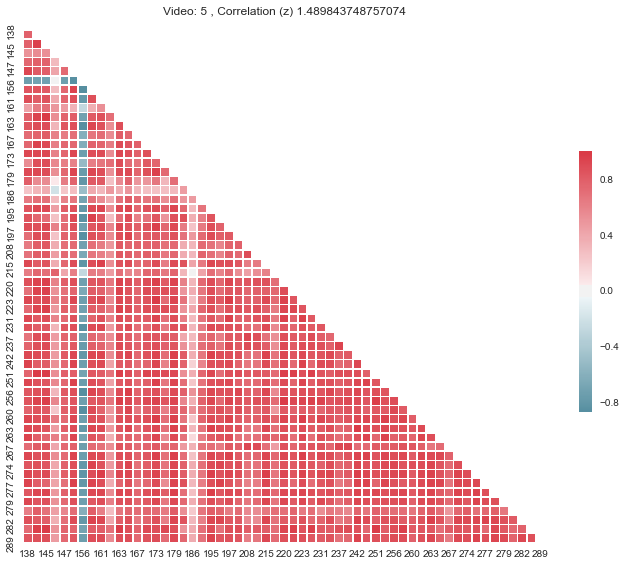

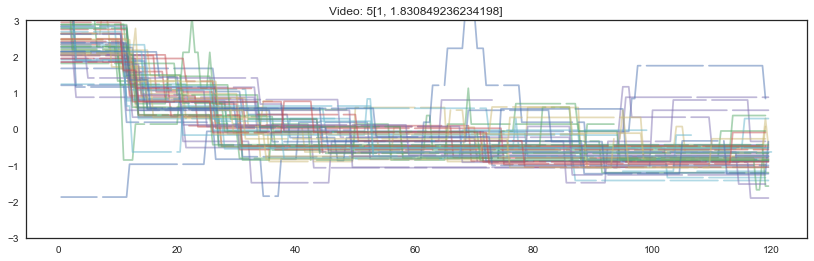

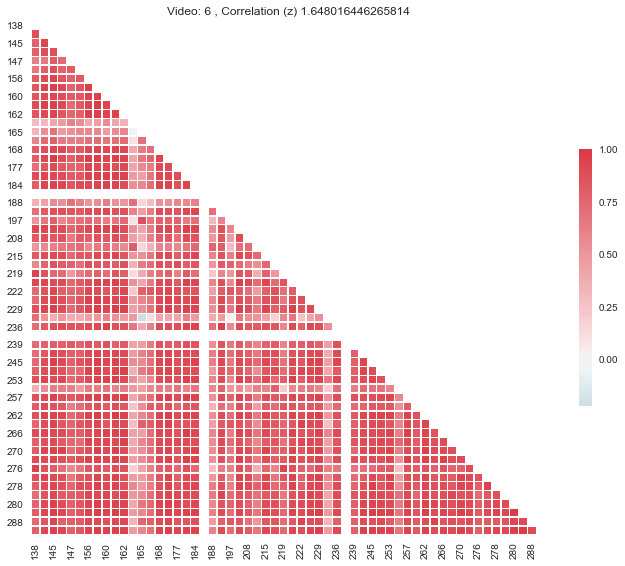

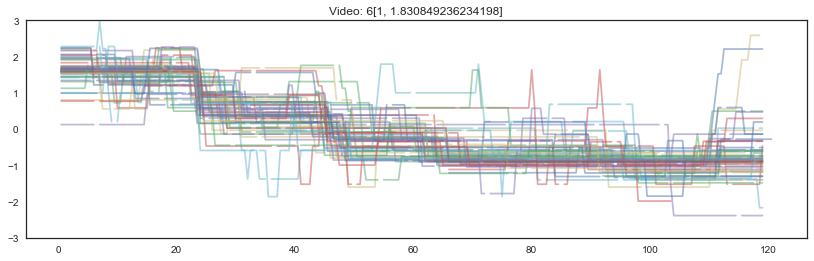

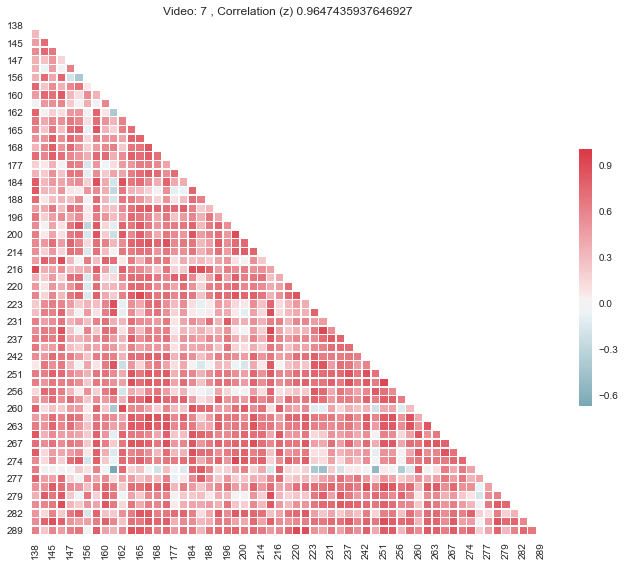

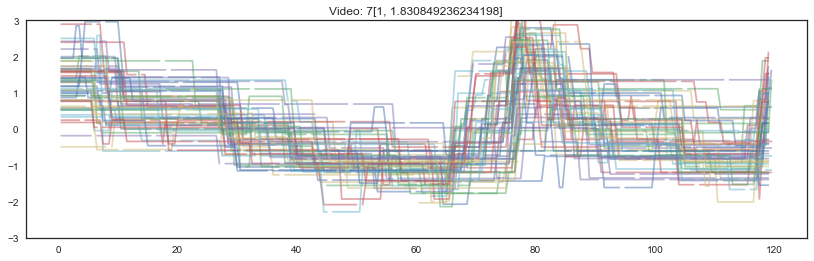

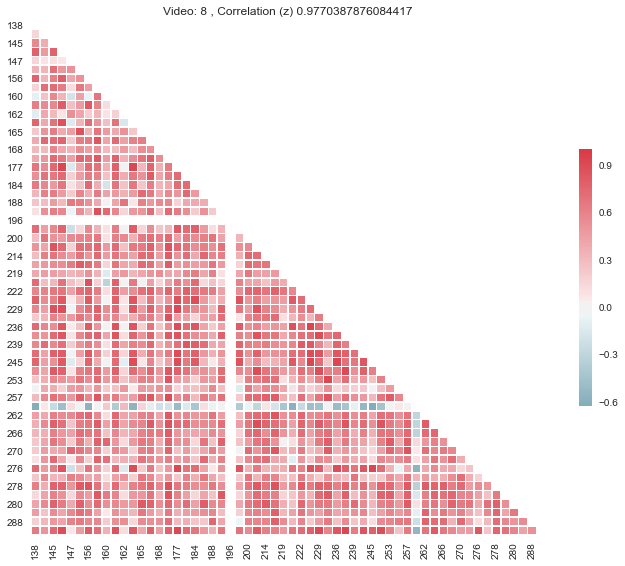

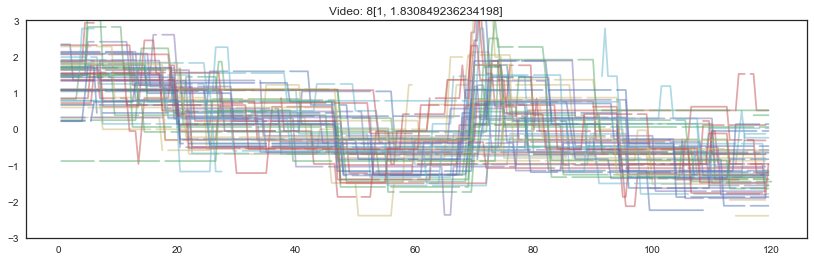

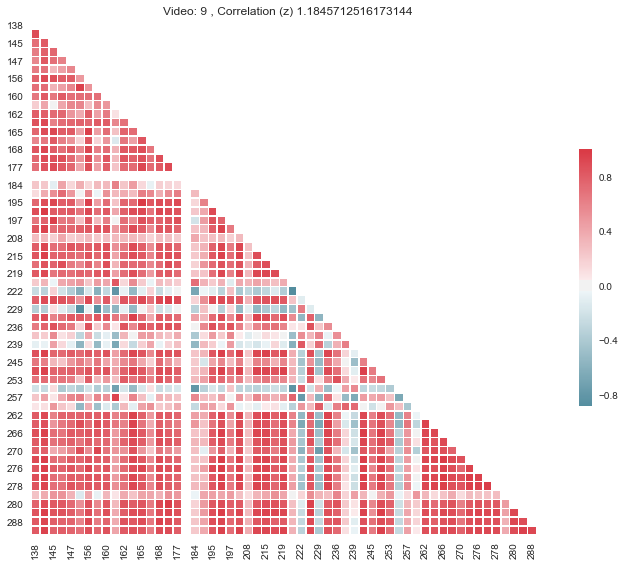

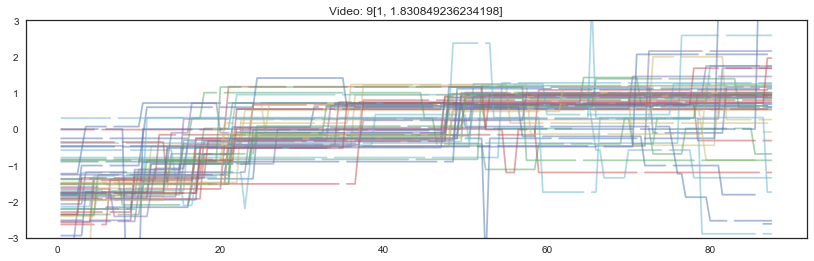

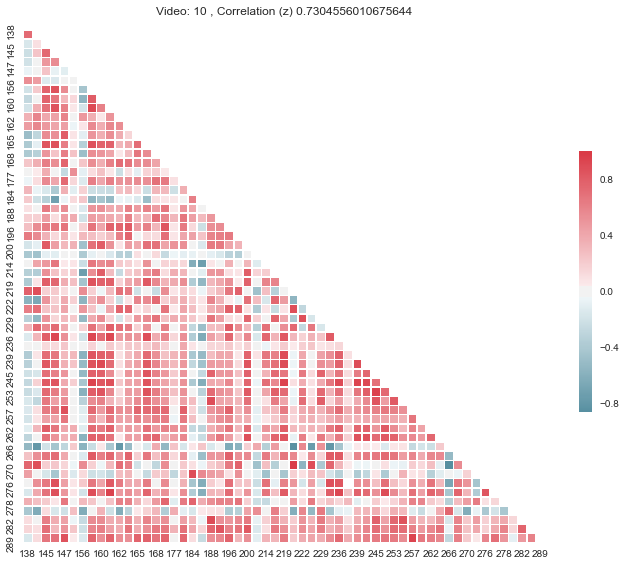

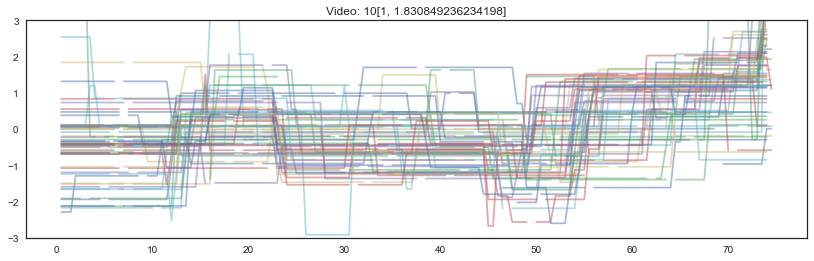

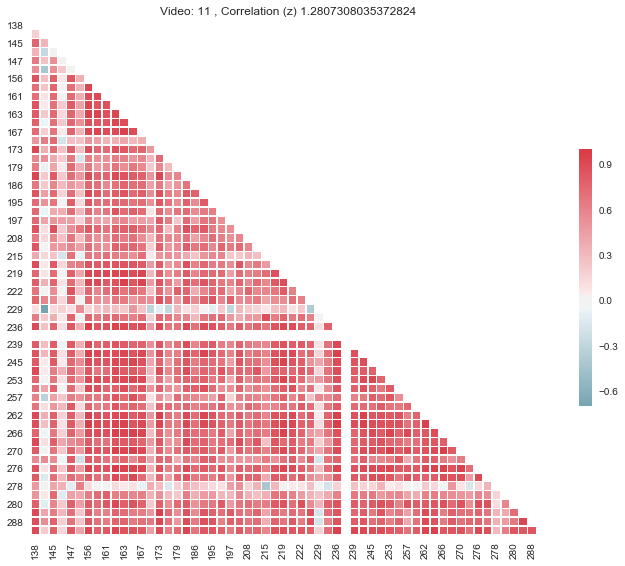

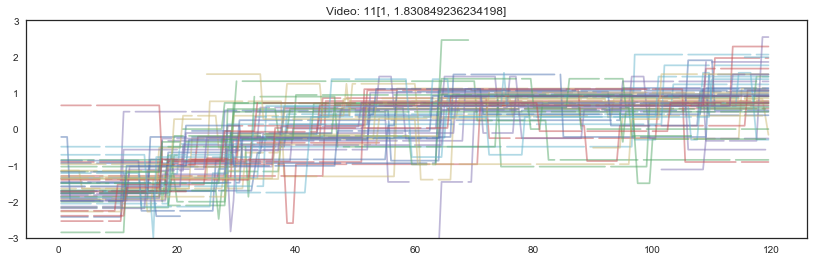

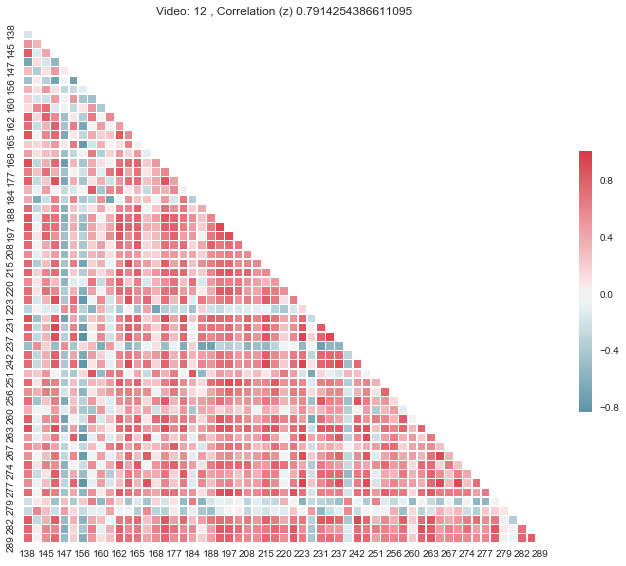

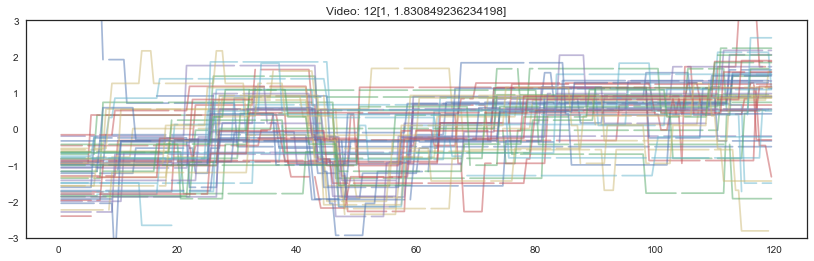

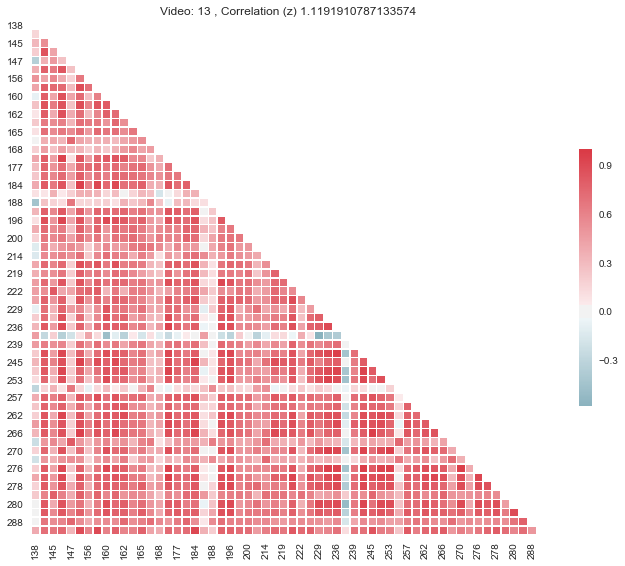

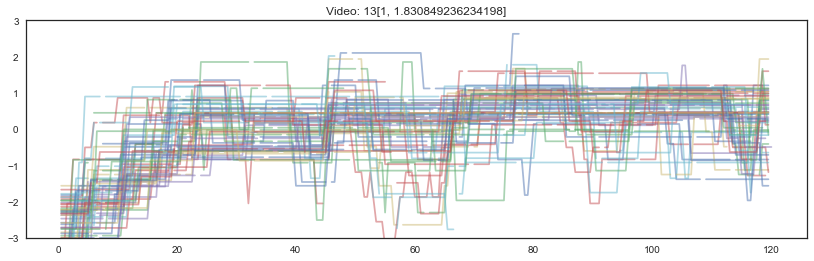

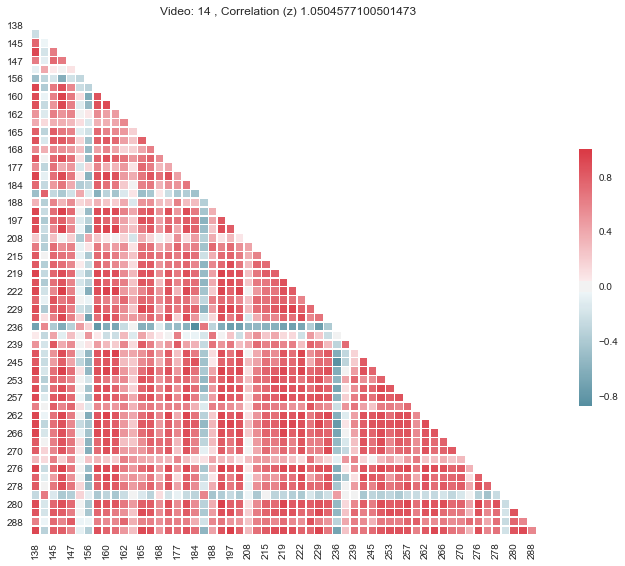

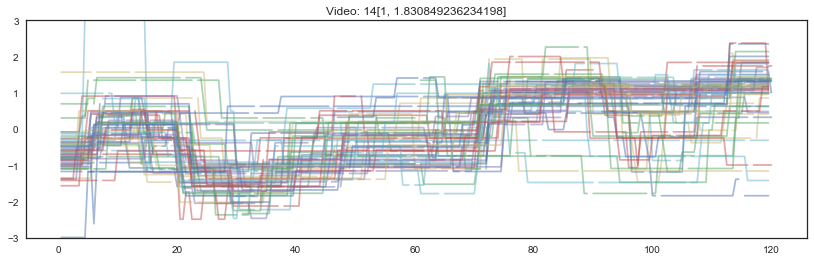

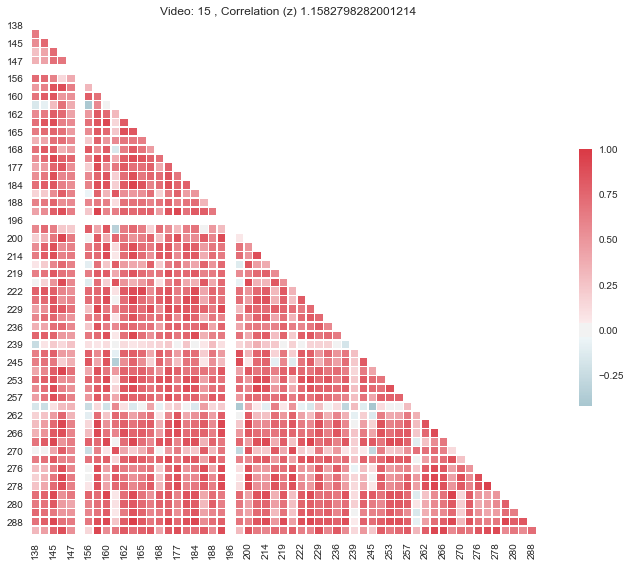

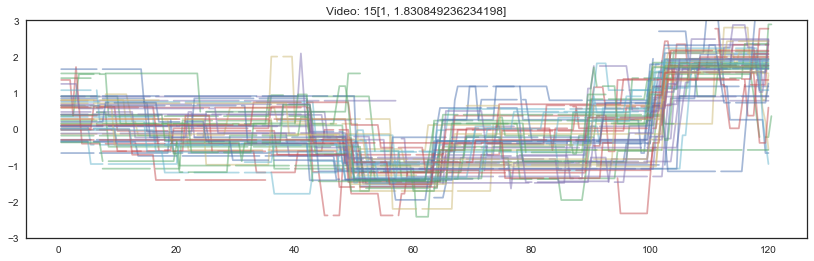

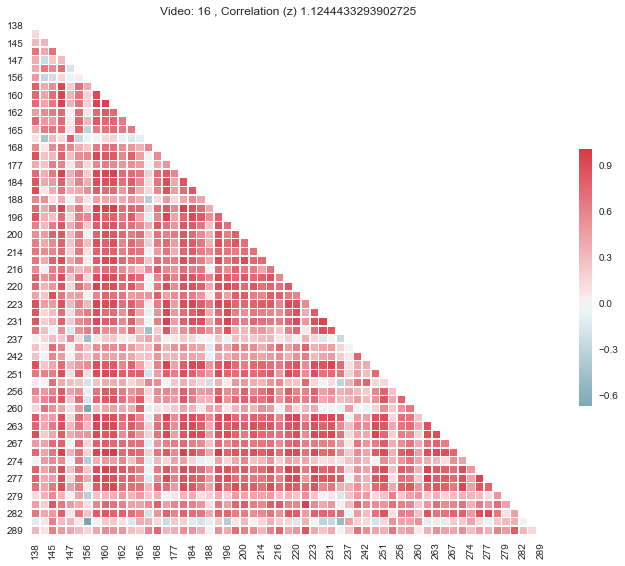

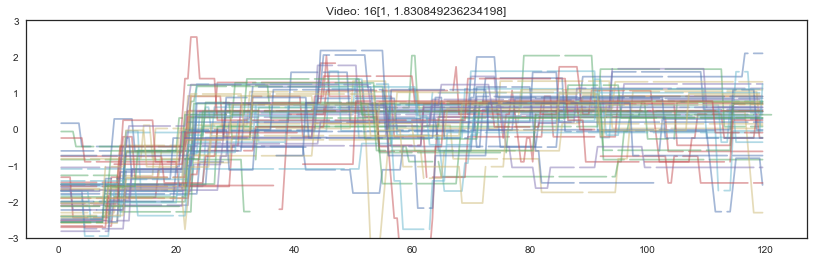

In [127]:
z_correlations = []
for video in range(1, 17): 
    all_video_data = pd.read_csv(derivative_filepath + 'correlationdata/' + 'video_all_' + str(video) + '.csv')
    all_video_data_dropped = all_video_data.drop(['second'], axis=1)
    z_correlations.append([video, calculate_aver_correlation(all_video_data_dropped)])

    
    calculate_aver_correlation(all_video_data_dropped)
        
    # Plot correlations
    plot_corrs(all_video_data, video)
    plt.tight_layout(pad=4)
    
    
    
    
    # Plot data
    x = all_video_data['second']
    y = all_video_data.drop(['second'], axis=1)

    # Z-score ratings by participant
    cols = list(y.columns)
    for col in cols:
        col_zscore = col
        y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)
    
    

    plt.figure(figsize=(14,4))
    plt.ylim(-3,3)
    plt.title('Video: ' + str(video) )
    plt.plot(x, y, alpha=.5);



## Sliding Window Correlations (30 second window)

/Users/mdclark/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/mdclark/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3154: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mdclark/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3088: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
/Users/mdclark/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_

Z Correlations w/ sampling sampling_rate of 10 seconds


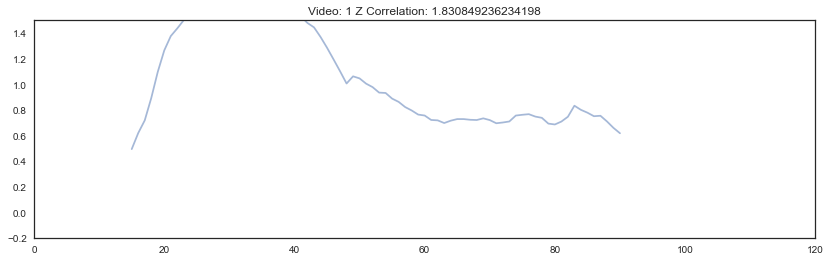

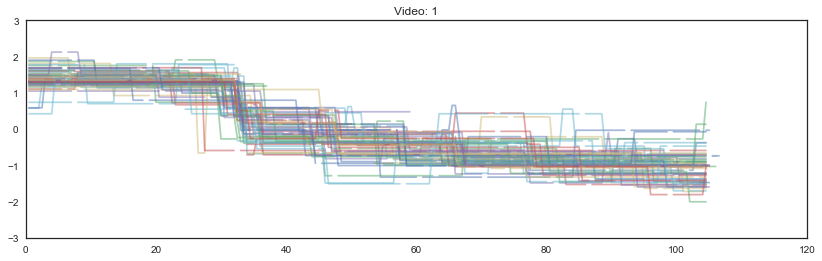

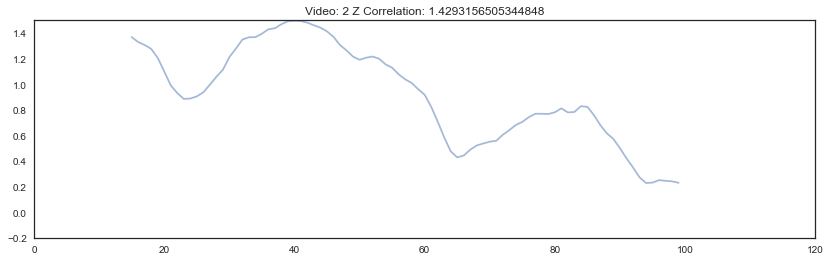

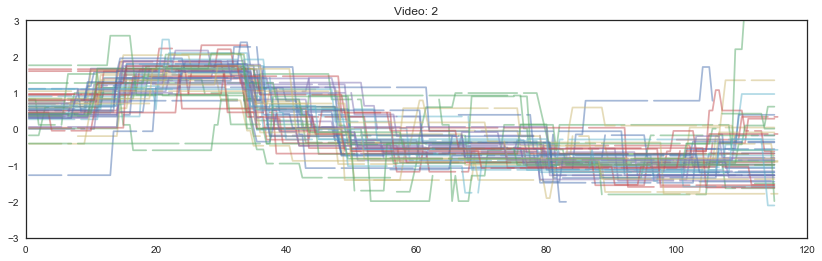

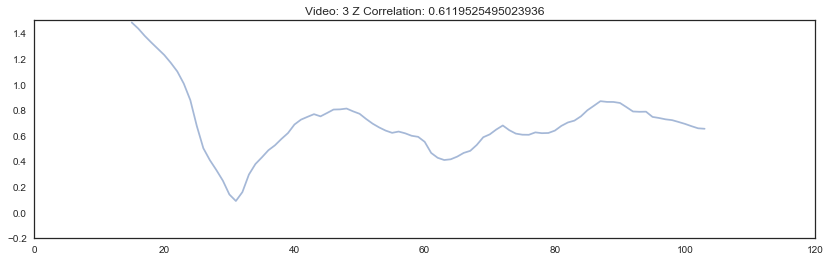

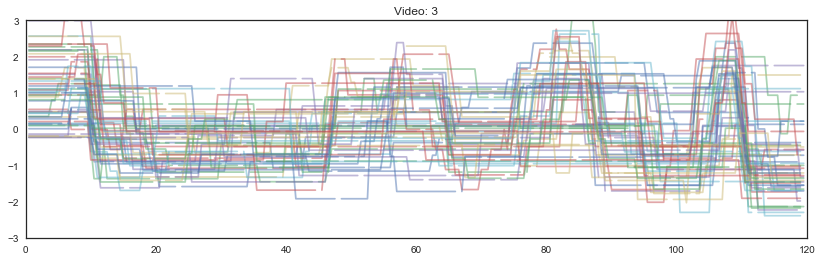

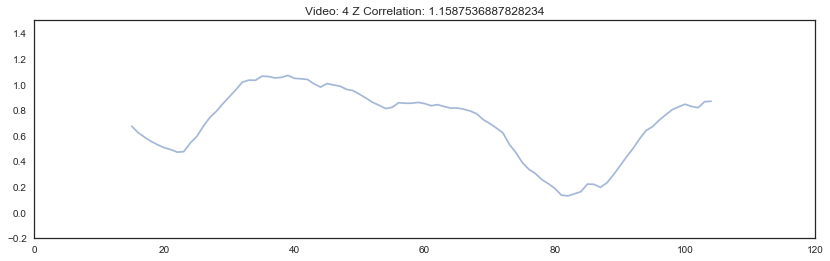

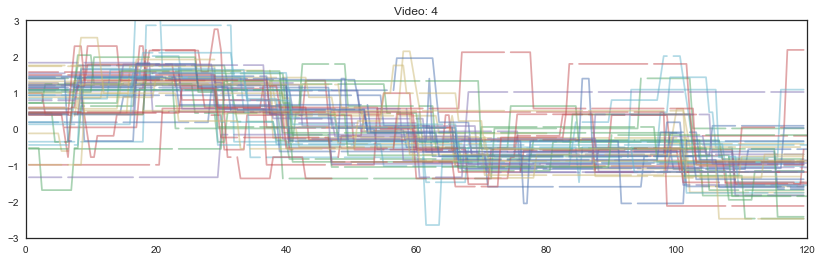

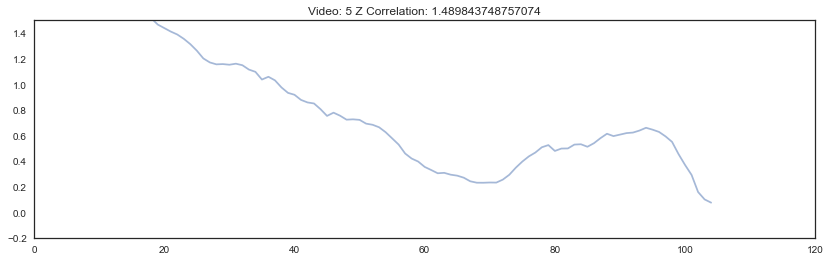

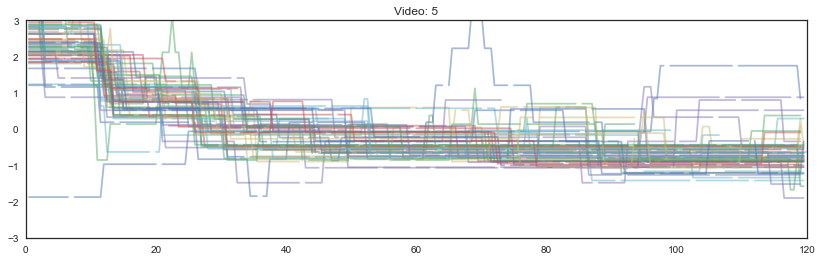

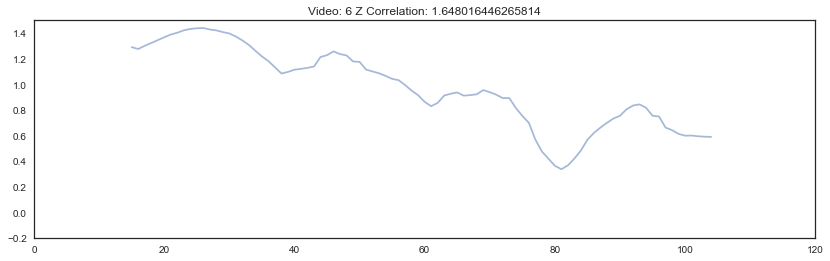

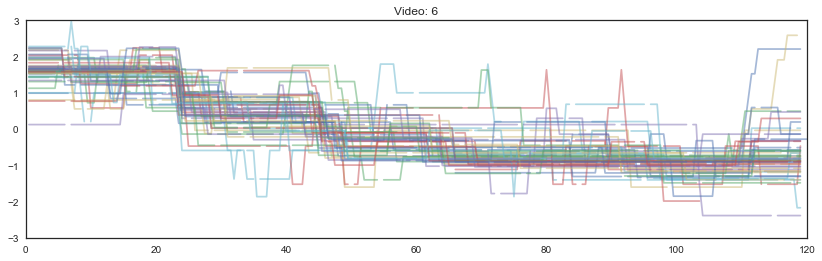

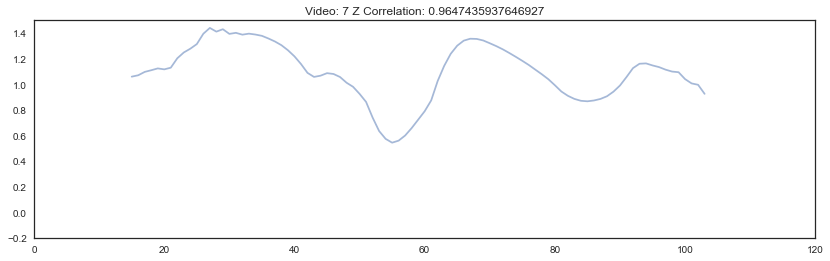

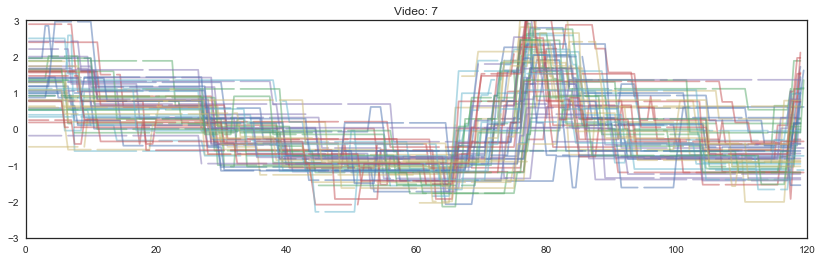

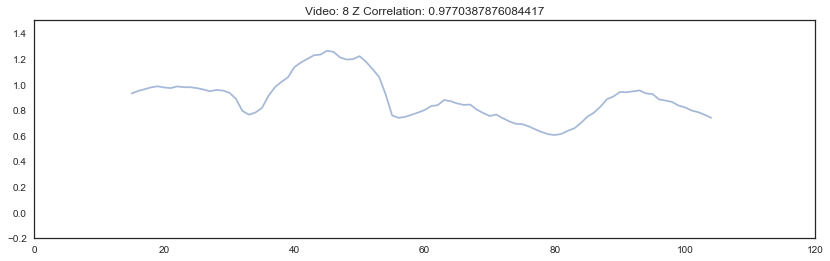

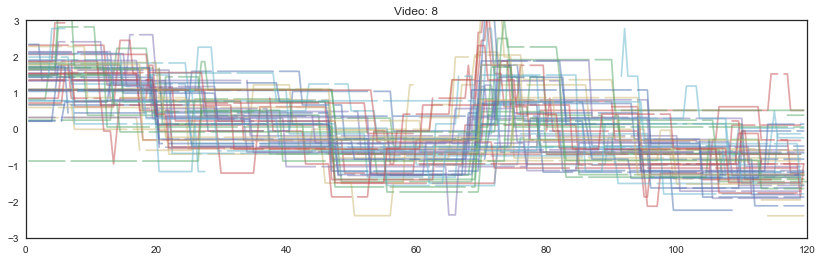

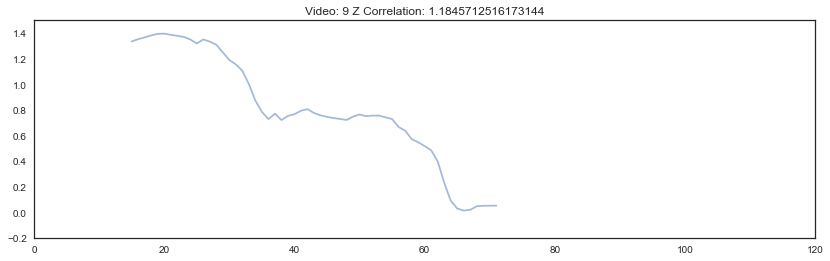

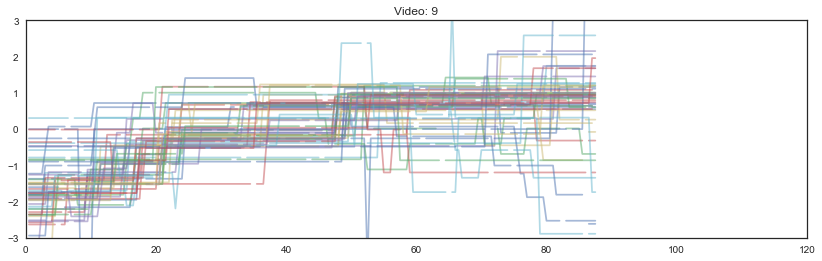

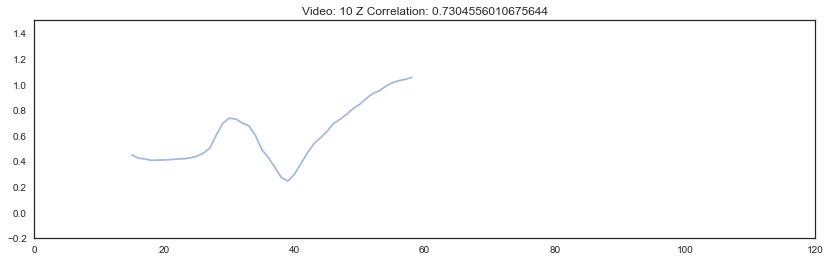

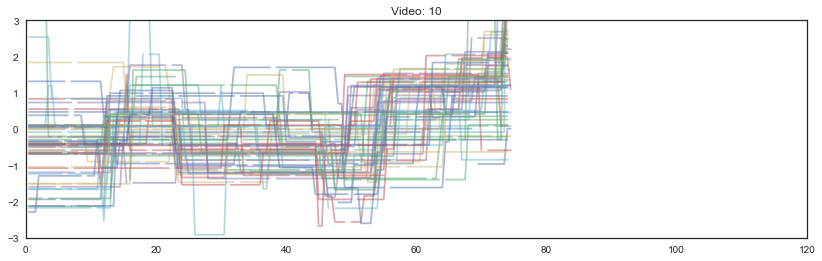

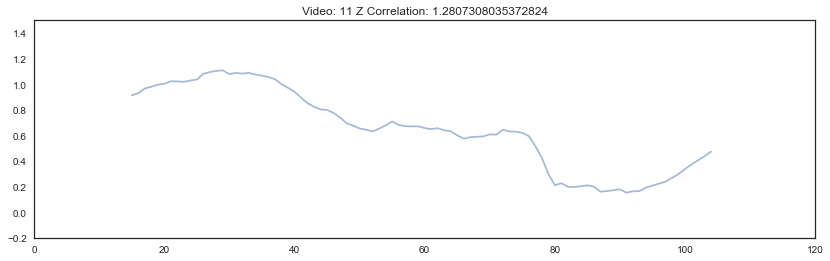

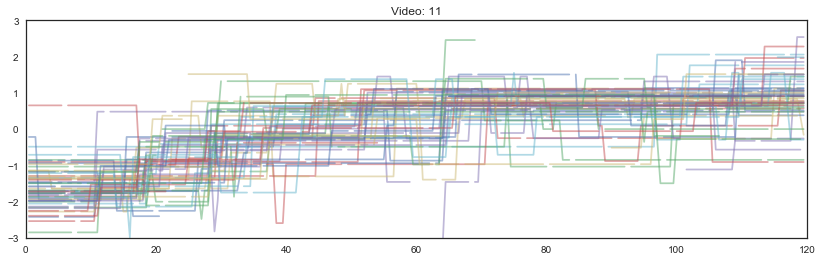

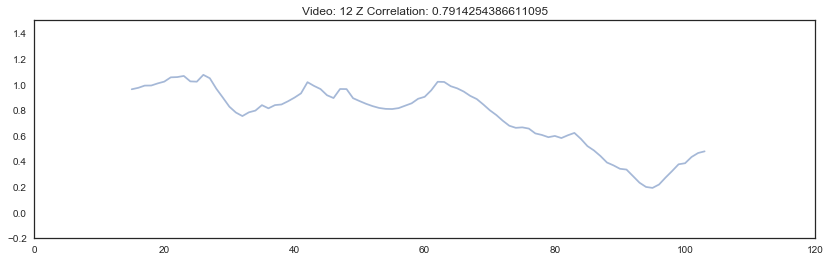

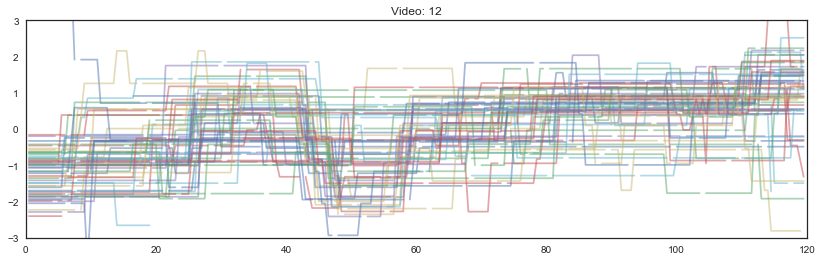

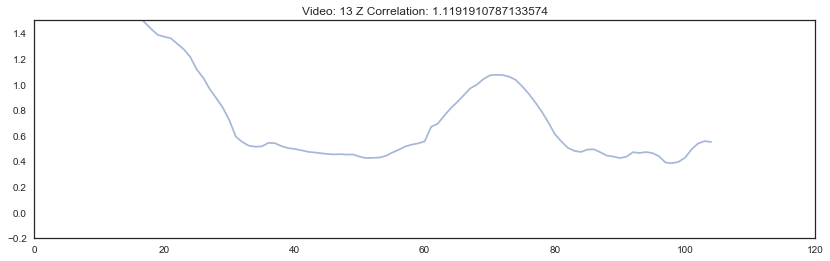

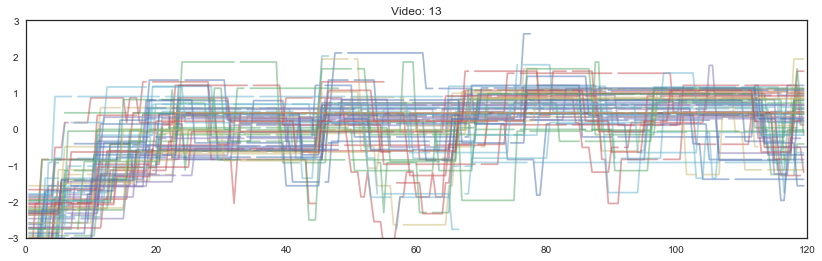

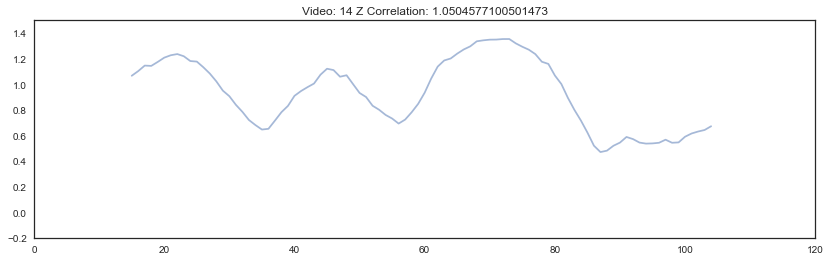

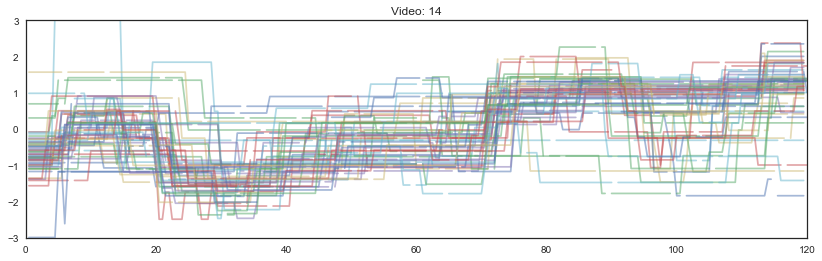

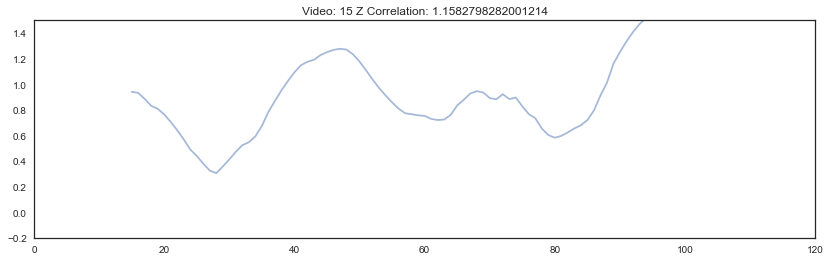

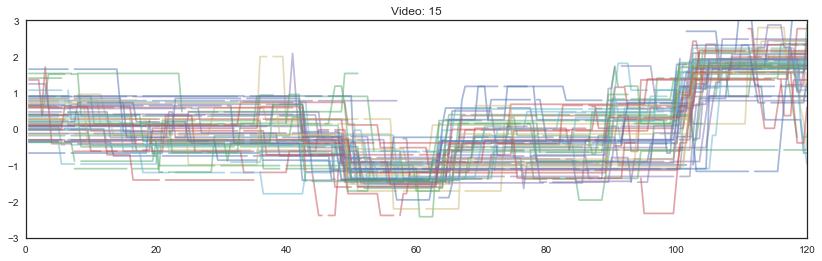

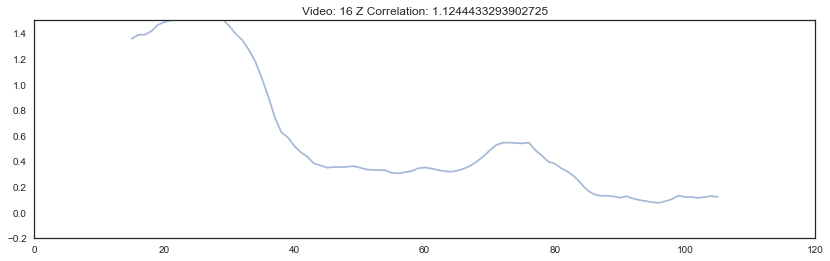

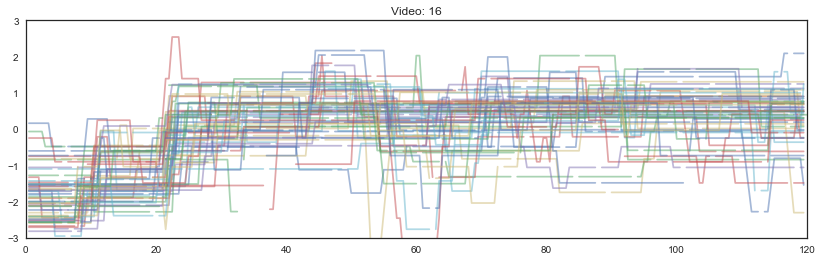

In [125]:
#Sliding window

for video in range(1, 17): 
    
    #Initialize
    z_correlations = []
    z_ratings = []
    window = 15 
    all_video_data = pd.read_csv(derivative_filepath + 'correlationdata/' + 'video_all_' + str(video) + '.csv')
        
    #Z score participant ratings (columns)
    y = all_video_data.drop(['second'], axis=1)
    cols = list(y.columns)
    for col in cols:
        col_zscore = col
        y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)
        

        
    # Get Z scored correlations and ratings    
    for timepoint in range(window, int(all_video_data['second'].max()-window), 1):
        cropped_video_data = all_video_data[(all_video_data['second'] >= timepoint - window) &\
                                            (all_video_data['second'] <= timepoint + window) ] 
        cropped_video_data_dropped = cropped_video_data.drop(['second'], axis=1)
        
        z_correlations.append([video, timepoint, calculate_aver_correlation(cropped_video_data_dropped)])
        
        z_ratings.append([video, timepoint, y.ix[timepoint-window:timepoint+window,:].stack().mean() ]); 
       
    z_correlations = pd.DataFrame(z_correlations)    
    average_z_correlation = calculate_aver_correlation(all_video_data.drop(['second'], axis=1))
    z_ratings = pd.DataFrame(z_ratings)    
             
        
    # Plot data
    x = z_correlations[1]
    y = z_correlations[2]
    plt.figure(figsize=(14,4))
    plt.xlim(0,120)
    plt.ylim(-.2,1.5)
    plt.title('Video: ' + str(video) + " Z Correlation: " + str(average_z_correlation))
    plt.plot(x, y, alpha=.5);
    

    # Plot data
    x = all_video_data['second']
    y = all_video_data.drop(['second'], axis=1)
    
    cols = list(y.columns)
    for col in cols:
        col_zscore = col
        y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)
    
    
    plt.figure(figsize=(14,4))
    plt.xlim(0,120)
    plt.ylim(-3,3)
    plt.title('Video: ' + str(video))
    plt.plot(x, y, alpha=.5);


    
    
print("Z Correlations w/ sampling sampling_rate of 10 seconds")

### Z scored average correlations and BEQ (expressivity)

(-0.14959947193901593, 0.72365793731797567)

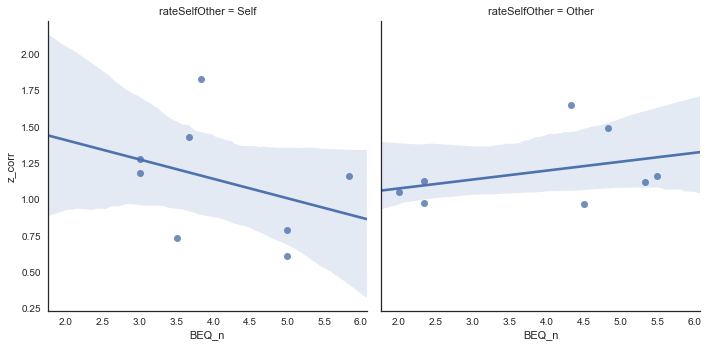

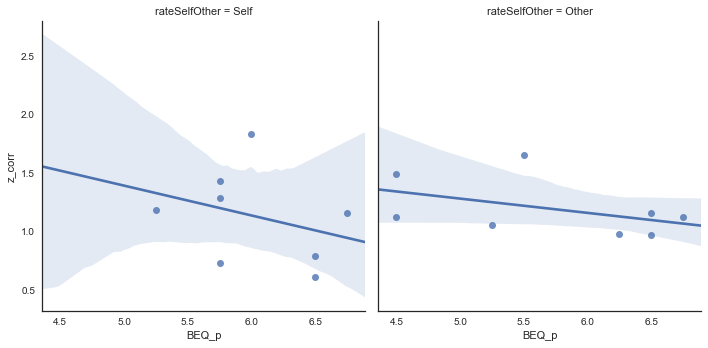

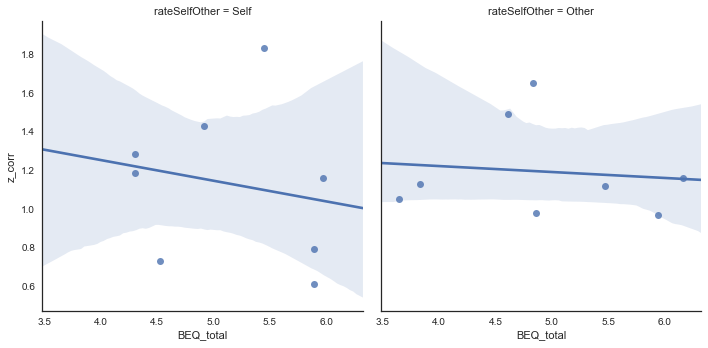

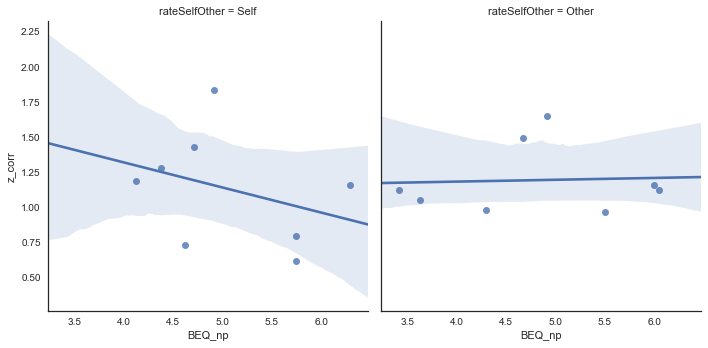

In [136]:
BEQ  = pd.read_csv('/Users/mdclark/Desktop/EmpAcc/data/behavioraldata/BEQ.csv')
BEQ = BEQ.merge(pd.DataFrame(z_correlations, columns=['videoNumber', 'z_corr']))


sns.lmplot('BEQ_n', 'z_corr', col='rateSelfOther', fit_reg = True, data=BEQ)
sns.lmplot('BEQ_p', 'z_corr', col='rateSelfOther', data=BEQ)#
sns.lmplot('BEQ_total', 'z_corr', col='rateSelfOther', data=BEQ)#

BEQ['BEQ_np'] = BEQ[['BEQ_n', 'BEQ_p']].mean(axis=1)
sns.lmplot('BEQ_np', 'z_corr', col='rateSelfOther', data=BEQ)

import numpy
numpy.corrcoef(BEQ['BEQ_np'], BEQ['z_corr'])



import scipy
scipy.stats.pearsonr(BEQ_negative['BEQ_n'], BEQ_negative['z_corr'])



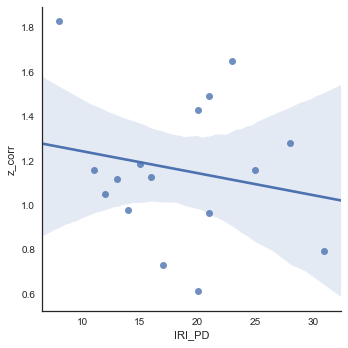

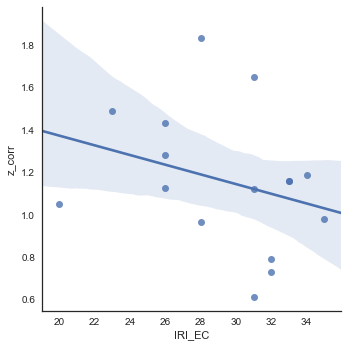

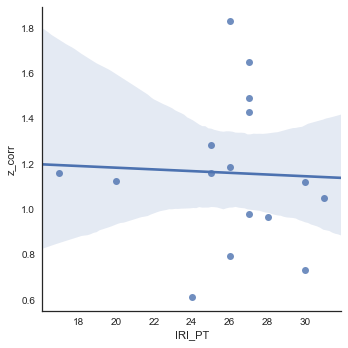

In [152]:
IRI  = pd.read_csv('/Users/mdclark/Desktop/EmpAcc/data/behavioraldata/IRI.csv')
IRI = IRI.merge(pd.DataFrame(z_correlations, columns=['videoNumber', 'z_corr']))


sns.lmplot('IRI_PD', 'z_corr', fit_reg = True, data=IRI)
sns.lmplot('IRI_EC', 'z_corr', data=IRI)#
sns.lmplot('IRI_PT', 'z_corr', data=IRI)#



In [ ]:
for video in range(1, 17): 
    z_correlations = []
    z_ratings = []
    sampling_rate = 20
    all_video_data = pd.read_csv(derivative_filepath + 'correlationdata/' + 'video_all_' + str(video) + '.csv')
        
    #Z score participant ratings    
    y = all_video_data.drop(['second'], axis=1)
    cols = list(y.columns)
    for col in cols:
        col_zscore = col
        y[col_zscore] = (y[col] - y[col].mean())/y[col].std(ddof=0)
        
    # Get Z scored correlations and ratings    
    for timepoint in range(10, 130, sampling_rate):
        cropped_video_data = all_video_data[(all_video_data['second'] >= timepoint - sampling_rate) & (all_video_data['second'] < timepoint)] 
        cropped_video_data_dropped = cropped_video_data.drop(['second'], axis=1)
        
        z_correlations.append([video, timepoint, calculate_aver_correlation(cropped_video_data_dropped)])
        
        z_ratings.append([video, timepoint, y.ix[timepoint-sampling_rate:timepoint,:].stack().mean() ]); 
       
    z_correlations = pd.DataFrame(z_correlations)    
    average_z_correlation = calculate_aver_correlation(all_video_data.drop(['second'], axis=1))
    z_ratings = pd.DataFrame(z_ratings)    
                   
    
    all_z = pd.merge(z_ratings, z_correlations, on=1)
    sns.lmplot('2_x', '2_y', data=all_z)
    
    
print("Z Correlations w/ sampling sampling_rate of 10 seconds")